<a href="https://colab.research.google.com/github/Dalthirr/NeuralNetworks/blob/Model/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import sklearn
import keras
import seaborn
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
!pip install -q keras_metrics
import keras_metrics
from sklearn.model_selection import cross_validate
!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import precision_recall_fscore_support as score

Using TensorFlow backend.


In [2]:
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych
df = df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1)
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [0]:
X=df.drop(['Exited'], axis=1)
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

scaler=StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

X_std=scaler.transform(X)




**Tomek**
Zbuduję przykładową sieć, któa składa się z Layera wejściowego, jednoego ukrytego i wyjściowego.
Kompilujemy model przy użyciu 
loss_function='binary_crossentripy'
optimizer='Adam'
**naszą główną metryką będzie precyzja**
Czyli jaki procent z osób, ktore zostały określone jako zagrożone do odejścia z banku faktycznie taki jest.
**oraz precyzja**

In [4]:


# Creating Model, I will build simple networt using Sequential.
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(121, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model.fit(X_train_std, y_train,epochs=3, batch_size=1, verbose=1,validation_data=(X_test,y_test))

model.evaluate(X_test_std,y_test)




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6700 samples, validate on 3300 samples
Epoch 1/3
6700/6700 [==============================] - 40s 6ms/step - loss: 0.4333 - precision: 0.6134 - acc: 0.8134 - val_loss: 6.1813 - val_precision: 0.2458 - val_acc: 0.6133
Epoch 2/3
6700/6700 [==============================] - 40s 6ms/step - loss: 0.3709 - precision: 0.7247 - acc: 0.8467 - val_loss: 8.5011 - val_precision: 0.2444 - val_acc: 0.4673
Epoch 3/3
3300/3300 [==============================] - 0s 70us/step


[0.3613393403905811, 0.7020833331870661, 0.8551515151515151]

In [14]:

y_pred=model.predict_classes(X_test_std)
report=classification_report(y_test,y_pred)
report1=classification_report(y_test,y_pred,output_dict=True)
print(report)
'''
predykcja={'predykcja':list(y_pred),'Cel':list(y_test)}
check=pd.DataFrame.from_dict(predykcja)
check
'''
print(report1['0']['precision'])


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2628
           1       0.70      0.50      0.59       672

    accuracy                           0.86      3300
   macro avg       0.79      0.72      0.75      3300
weighted avg       0.84      0.86      0.85      3300

0.8812056737588653


In [17]:
nodes=[10,30,50,70,90,110]
wyniki={}
for i in nodes:
  model=0
# Creating Model, I will build simple networt using Sequential.
  model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
  model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
  model.add(Dense(i, activation='relu'))



# Add an output layer 
  model.add(Dense(1, activation='sigmoid'))


  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
  model.fit(X_train_std, y_train,epochs=5, batch_size=1, verbose=1,validation_data=(X_test,y_test))

  model.evaluate(X_test_std,y_test)
  y_pred=model.predict_classes(X_test_std)
  report=classification_report(y_test,y_pred,output_dict=True)
  wyniki.update({i: [report['0']['precision'],report['1']['precision']]})

print(wyniki)
  
  

Train on 6700 samples, validate on 3300 samples
Epoch 1/5
6700/6700 [==============================] - 41s 6ms/step - loss: 0.4299 - precision: 0.6692 - acc: 0.8164 - val_loss: 3.2822 - val_precision: 0.0000e+00 - val_acc: 0.7964
Epoch 2/5
6700/6700 [==============================] - 40s 6ms/step - loss: 0.3681 - precision: 0.7068 - acc: 0.8470 - val_loss: 3.2822 - val_precision: 0.0000e+00 - val_acc: 0.7964
Epoch 3/5
6700/6700 [==============================] - 40s 6ms/step - loss: 0.3518 - precision: 0.7448 - acc: 0.8564 - val_loss: 3.2822 - val_precision: 0.0000e+00 - val_acc: 0.7964
Epoch 4/5
6700/6700 [==============================] - 40s 6ms/step - loss: 0.3480 - precision: 0.7469 - acc: 0.8563 - val_loss: 3.2822 - val_precision: 0.0000e+00 - val_acc: 0.7964
Epoch 5/5
3300/3300 [==============================] - 0s 76us/step
Train on 6700 samples, validate on 3300 samples
Epoch 1/5
6700/6700 [==============================] - 41s 6ms/step - loss: 0.4350 - precision: 0.6065 - acc

In [21]:
from keras.callbacks import EarlyStopping
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(90, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(X_train_std, y_train,epochs=30, batch_size=1, verbose=1,validation_data=(X_test,y_test),callbacks=[early_stopping_monitor])

model.evaluate(X_test_std,y_test)
y_pred=model.predict_classes(X_test_std)
report=classification_report(y_test,y_pred)
report1=classification_report(y_test,y_pred,output_dict=True)
print(report)

                                       
                                    

Train on 6700 samples, validate on 3300 samples
Epoch 1/30
6700/6700 [==============================] - 42s 6ms/step - loss: 0.4214 - precision: 0.6696 - acc: 0.8191 - val_loss: 3.2871 - val_precision: 0.0000e+00 - val_acc: 0.7961
Epoch 2/30
6700/6700 [==============================] - 42s 6ms/step - loss: 0.3644 - precision: 0.7260 - acc: 0.8497 - val_loss: 8.4940 - val_precision: 0.2445 - val_acc: 0.4676
Epoch 3/30
3300/3300 [==============================] - 0s 84us/step
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2628
           1       0.81      0.40      0.54       672

    accuracy                           0.86      3300
   macro avg       0.84      0.69      0.73      3300
weighted avg       0.85      0.86      0.84      3300



**Paweł**

In [0]:

df2=pd.read_csv(url).drop(["CustomerId", "Surname", "RowNumber", "HasCrCard"],
        axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df2[["Gender", "Geography"]], axis=1)

X2=df2.drop(['Exited'], axis=1)
y2=df2['Exited']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)


scaler2=StandardScaler().fit(X_train2)
X_train_std2 = scaler2.transform(X_train2)

X_test_std2 = scaler2.transform(X_test2)

X_std2=scaler2.transform(X2)

class_weight = {
                0: 3.,
                1: 1.
               }

es = EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience = 3)




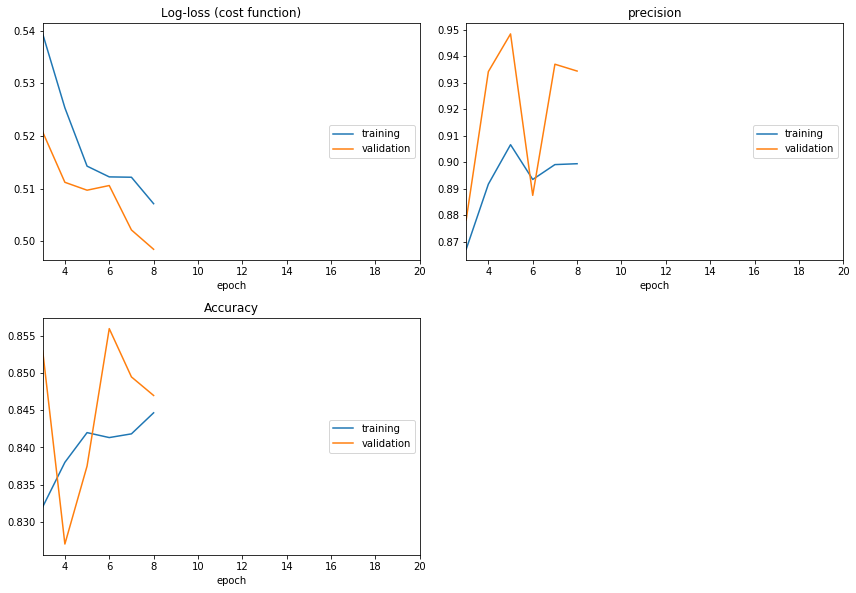

Log-loss (cost function):
training   (min:    0.507, max:    0.651, cur:    0.507)
validation (min:    0.498, max:    0.603, cur:    0.498)

precision:
training   (min:    0.839, max:    0.907, cur:    0.899)
validation (min:    0.851, max:    0.948, cur:    0.934)

Accuracy:
training   (min:    0.800, max:    0.845, cur:    0.845)
validation (min:    0.805, max:    0.856, cur:    0.847)
Epoch 00008: early stopping


In [0]:
model2=Sequential()
model2.add(Dense(20, activation='relu', input_shape=(10,)))


model2.add(Dropout(0.1,))
model2.add(Dense(75, activation='relu'))


model2.add(Dense(1, activation='sigmoid'))


model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model2.fit(X_train_std2, y_train2,epochs=20, batch_size=2, verbose=1, validation_split = 0.25, callbacks = [PlotLossesKeras(), es], class_weight=class_weight)



In [0]:
y_pred2=model2.predict_classes(X_test_std2)

report=classification_report(y_test2,y_pred2,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1593
           1       0.95      0.26      0.40       407

    accuracy                           0.85      2000
   macro avg       0.90      0.63      0.66      2000
weighted avg       0.86      0.85      0.81      2000

